# Нежное введение в pandas, matplotlib и seaborn

Эти три библиотеки - это столпы работы с big data, таблицами и графиками в Python. Сейчас Python - это главный язык аналитики и машинного обучения, уверенно борющийся с R. И все это благодаря библиотеке  pandas, т.к. без нее работа с данными в R оставалась бы в разы удобнее. Для того, чтобы полностью разобраться с pandas необходим отдельный курс по этой библиотеке. Тут будут приведены базовые методы для работы с данными и их последующей визуализацией.


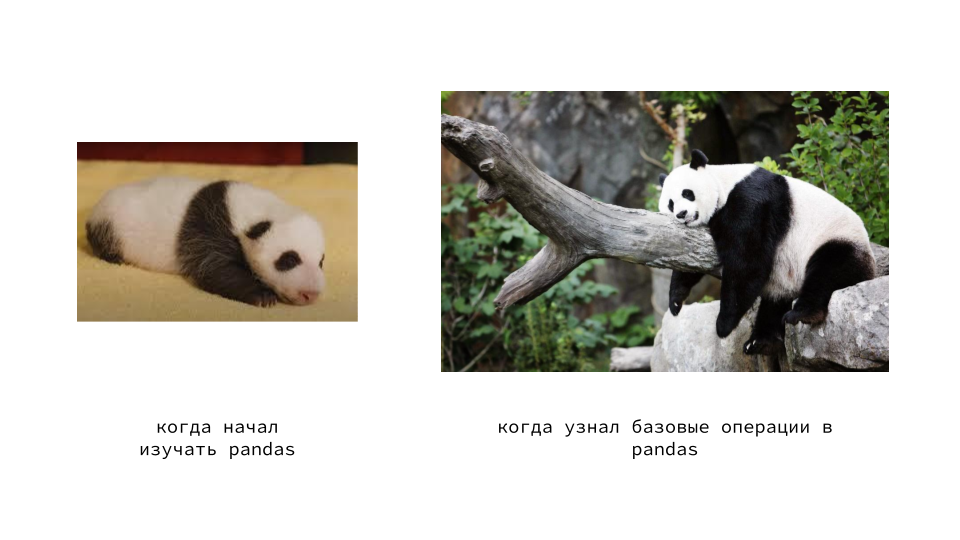

# Структуры данных

В pandas есть два типа данных: это Series и DataFrame. Начнем с первого. Series - это 1 мерный индексированный тип данных. Он очень похож на словарь, где ключ это индекс в Series, а значение это значение записи в Series соответсвующее определенному индексу. Но все же не стоит считать их словарем, т.к. это все равно другой тип данных. Создавать Series достаточно просто, достаточно прописать pandas.Series('Список с данными'). Т.е. в Series можно превратить любой имеющийся список с любыми данными, которые можно положить в список. Для начала работы с pandas необходимо данную библиотеку установить или если пользуетесь Jupyter то просто импортировать, т.к. у Jupyter она заранее предустановлена. Стандартным импортом библиотеки pandas является сокращение pd. Если смотреть любой туториал, документацию, то всегда pandas импортируется с сокращением pd. Это такой же стандарт как и numpy в np.

### Pandas Series

In [1]:
import pandas as pd
import numpy as np

ser = pd.Series(['Первый', 'Второй', 'Третий'])
ser

0    Первый
1    Второй
2    Третий
dtype: object

Еще одним способом создания Series является использование словарей. Для этого необходимо при создании передать аргументы data, и index, где data - это словарь, а index - это какие ключи из словаря использовать.

In [2]:
# Создание Series с помощью словаря
d = {'a': 1, 'b': 2, 'c': 3}

ser1 = pd.Series(data=d, index= d.keys())
ser1

a    1
b    2
c    3
dtype: int64

Также аргумент index можно передавать через срез списка или просто передать свой список, чтобы взять не все ключи из словаря 

In [3]:
# Создание Series с помощью словаря
d = {'a': 1, 'b': 2, 'c': 3}

pd.Series(data=d, index=['a', 'b'])


a    1
b    2
dtype: int64

Но стоит понимать, что в этом случае аргумент index берет значения ключей переданных ему из словаря переданного в data. Поэтому если ключей переданных в index в словаре нет, то просто значение данного индекса в Series будет NaN

In [4]:
d = {'a': 1, 'b': 2, 'c': 3}
ser2 = pd.Series(data=d, index=['x', 'y', 'z'])
ser2

x   NaN
y   NaN
z   NaN
dtype: float64

Довольно много методов для работы с Series совпадают с методами DataFrame, т.к. Series составляют DataFrame, поэтому разберем ключевые методы для работы с типами данных на примере DataFrame

### Pandas DataFrame

Второй тип данных, это уже DataFrame который представляет из себя двухмерный тип данных, т.е. проще говоря это таблица в которой строками являются тип данных Series. Выглядят они уже чуть более презентабельно, чем Series. Создать их можно также из списка, можно создать из Series

In [5]:
df = pd.DataFrame(['Первый', 'Второй', 'Третий'])
df

,0
0,Первый
1,Второй
2,Третий


In [6]:
pd.DataFrame(ser)


,0
0,Первый
1,Второй
2,Третий


Так как Series - это по своей сути строка в DataFrame, Можно передать ему несколько Series и их количество будет равно количеству столбцов в DataFrame. 

In [7]:
pd.DataFrame([ser, ser, ser])


,0,1,2
0,Первый,Второй,Третий
1,Первый,Второй,Третий
2,Первый,Второй,Третий


Но в таком случае нельзя задавать названия для столбцов, т.к. в таком случае название столбца берется из индкса в серии, если к примеру, у вас есть несколько серий в который индексы совпадают, а если не совпадают будут дополнительно добавляться все несовпадающие индексы, как отдельные столбцы. И значения каждой серии это будет строка в DataFrame, а номер строки - это то, какая была серия по порядку в списке. Строки, в которых индексы не совпадают, будет просто добавляться с NaN. Т.е., если у вас будет, к примеру, 3 серии с полностью разными индексами, и в каждой Series было 3 элемента, то ваш DataFrame будет состоять из 6 столбцов. Звучит сложно, но на примере будет понятнее:

In [8]:
# DataFrame из 3 одинаковых Series
pd.DataFrame([ser1, ser1, ser1])


,a,b,c
0,1,2,3
1,1,2,3
2,1,2,3


In [26]:
# DataFrame из 3 разных Series

ser3 = pd.Series(data={'x':'икс', 'y':'игрек', 'z':'зед'}, index= list('xyz'))
pd.DataFrame([ser, ser1, ser3])

,0,1,2,a,b,c,x,y,z
0,Первый,Второй,Третий,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,икс,игрек,зед


Создавая DataFrame с использованием списков ситуация  похожа на Series. В самом начале, мы создали DataFrame передав ему список и в таком случае каждый элемент списка стал строкой и созданный DataFrame имел только 1 столбец. Но если надо наоборот, чтобы каждый элемент списка - был столбцом? В таком случае в DataFrame необходимо просто передать 2 мерную конструкцию, т.е. список содержащий списки. В таком случае, каждый отдельный список - это будующая строка в DataFrame, а каждый элемент - это значение столбца. 
Также при создании DataFrame из списка, можно добавить названия будующих столбоцв с помощью аргумента columns, которому передается список с названиями столбцов. Опять же, на примере будет все гораздо понятнее:

In [34]:
# Создания DaFrame с помощью списка со вложенным списком
pd.DataFrame([['Первый', 'Второй', 'Третий']], columns=['Column 1', 'Column 2', 'Column 3'])


,Column 1,Column 2,Column 3
0,Первый,Второй,Третий


In [35]:
# Создания DaFrame с помощью списка со вложенным списками
pd.DataFrame(
    [['Первый', 'Второй', 'Третий'], 
    ['Первый', 'Второй', 'Третий']],
    columns=['Column 1', 'Column 2', 'Column 3']
    )

,Column 1,Column 2,Column 3
0,Первый,Второй,Третий
1,Первый,Второй,Третий


Также DataFrame можно создавать из словаря, как и в случае с Series. Только тут уже ключи словаря - это названия столбцов, а значения, это строки. Для того, чтобы создать DataFrame через словарь, значения должны быть обязательно в списке (или кортеже). Тогда, каждое значение в списке, это будет значение строки в столбце под данным ключом. Звучит опятьже довольно таки замедренно, но на примере будет понятнее

In [9]:
d = {'One': [1, 'Один'], 'Two': [2, 'Два'], 'Three': [3, 'Три'], 'For': [4, 'Четыре']}
df = pd.DataFrame(d)

dictionary = df.to_dict()
dictionary

{'One': {0: 1, 1: 'Один'},
 'Two': {0: 2, 1: 'Два'},
 'Three': {0: 3, 1: 'Три'},
 'For': {0: 4, 1: 'Четыре'}}

В DataFrame кроме названия столбцов, можно давать и назвния строкам, чтобы не использовать автоматически генерирующиеся индексы. Для этого нужно передать в аргумент index список со теми индексами, которые хочется видеть. Важно помнить, что количество элементов в списке передаваеом в аргумент index должно быть равно количеству строк в вашем DataFrame. Также в DataFrame можно отдельно дать название колонке, в которой у вас находятся индексы. Делается это просто: DataFrame.index.name и даете название вашему индексу. Пример будет чуть более понятен:

In [39]:
df = pd.DataFrame(d, index = ['Первая строка', 'Вторая строка'])
df.index.name = 'Строки'
df

,One,Two,Three,For
Строки,,,,
Первая строка,1,2,3,4
Вторая строка,Один,Два,Три,Четыре


Ну и последний способ создания DataFrame - это передача ему массива numpy. Это очень популярный способ создания различных тестовых выборок в задачах машинного обучения или для оценки различных статистических метрик, т.к. numpy позволяет не просто создать список, а создать его сразу с числами. При таком использовании все будет также, как и в случае создания DataFrame через обычные списки - количество списков во вложенном списке - это количество строк, а количество элементов во вложенном списке - это количество столбцов. На словах, опять же, довольно сложно. Рассмотрим пример, где создадим с помощью np.random.randit() список, в котором будет 6 списков, в каждом из которых будет по 3 цифры. Также, назовем столбцы A B и C. 

Небольшая фича - в columns можно передавать строку и преобразовывать ее в список. Если вспомнить преобразование строк в списки, то там каждый элемент строки, становился отдельным элементом списка и в таком случае команда list('ABC') даст ['A', 'B', 'C']. Быстро и очень удобно

In [9]:
data = np.random.randint(10, size=(6,3))
print(data)
df1 = pd.DataFrame(data, columns = list('ABC'))
df1


[[1 9 9]
 [9 4 1]
 [4 9 7]
 [2 8 1]
 [1 3 7]
 [0 4 8]]


,A,B,C
0,1,9,9
1,9,4,1
2,4,9,7
3,2,8,1
4,1,3,7
5,0,4,8


### Чтение и запись данных из объектов pandas

Так как pandas позволяет представлять данные в виде таблиц, то безусловно у него есть функции чтения данных из файла. Причем данные функции сильно проще, чем открытие той же таблицы через open, да и вид самой таблицы гораздо лучше. Pandas может читать данные огромного количество форматов, может получать данные из таблиц SQL, из json, из всех стандартных текстовых форматов, может даже прочитать таблицу их exel и еще многих данных. Чтобы найти нужную команду достаточно просто посмотреть ее в документации по Pandas (https://pandas.pydata.org/pandas-docs/dev/reference/io.html). Вообще в данной лекции будет очень часто встречаться фраза: для остального смотрите документацию, т.к. каждый метод в pandas имеет огромное количество аргументов. Как пример, вот все возможные аргументы, которые могут указываться при чтении файла csv:

Как пример, вот все возможные аргументы, которые могут указываться при чтении файла csv:

pandas.read_csv(filepath_or_buffer, sep=NoDefault.no_default, delimiter=None, header='infer', names=NoDefault.no_default, index_col=None, usecols=None, squeeze=False, prefix=NoDefault.no_default, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None) 

В примерах разберем стандартную read_csv - которая читает файлы с разделителем ',' поумолчанию. Для чтения таблицы достаточно обратиться к нужному методу и передать ему путь до таблицы. Если у вас отличает разделитель - то его можно всегда передать в аргументе sep.

In [14]:
#import os
#os.chdir('C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners')

pd.read_csv('updated_tf_links_june.csv', sep = ';')

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,TF,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,unmatched,unmatched,unmatched,D3ZZW6,NaN,Rattus norvegicus


Также, при чтении таблицы из файла, можно задавать какой столбец в вашей таблице будет индексом, для этого достаточно передать в аргумент index_col название столбца. Если же, к примеру, у вас данные без названия столбцов, то можно просто передать номер столбца(индексация начинается с 0). В случае если аргументу ничего не передавать, то индекс будет автоматически генерироваться, как в примере выше.

In [15]:
# Создания столбца индексов по названию столбца
pd.read_csv('updated_tf_links_june.csv', sep = ';', index_col = 'Gene name')

,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
Gene name,,,,,,,
che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
ztf-26,TF,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...
Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus


In [17]:
# Создание индекса столбца по номеру
pd.read_csv('updated_tf_links_june.csv', sep = ';', index_col = 0)

,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
Gene name,,,,,,,
che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
ztf-26,TF,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...
Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus


Также из таблицы можно прочитать не все столбцы, а часть передав их названия или индексы в параметре usecols


In [19]:
pd.read_csv('updated_tf_links_june.csv', sep = ';', usecols = ['Gene name', 'Type', 'Animal_db'])

,Gene name,Type,Animal_db
0,che-1,TF,WBGene00000483
1,ztf-26,TF,WBGene00010137
2,ceh-89,TF,WBGene00009231
3,dpy-20,TF,WBGene00001079
4,hlh-32,TF,WBGene00013665
...,...,...,...
18261,Ep300,NaN,NaN
18262,Nf1,NaN,NaN
18263,Cep192,NaN,NaN
18264,Hils1,NaN,unmatched


Также при чтении таблицы, ее можно(и часто нужно) записывать в переменную. Также, если у вам надо посомтреть лишь первые 5 столбцов открывшейся таблицы, чтобы проверить, правильно ли все загрузилось, можно воспользоваться методом head()

In [6]:
gtrd = pd.read_csv('updated_tf_links_june.csv', sep = ';')
gtrd.head()

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,TF,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans


Как в случае и с pd.read, Pandas имеет такой же гирокий спект типов  данных в которые он может записать файлы. Делается это тоже довольно просто. В обычном случае достаточно передать путь до сохраняемого файла, если файла не существует, он его создаст автоматически. Также, довольно полезный аргумент index, который позволяет не сохранять индексы из таблицы DataFrame в файл. Удобно, когда вы используете автоматически сгенерированные индексы. Также, если вас не устраивает разделитель, который поумолчанию используется методом, вы можете использовать любой свой, с помощью аргумента sep.

In [153]:
gtrd.to_csv('saving_table.csv', index = False, sep=';')

## Базовые операции для работы с данными

Базовые операции - это необъятное количество различных методов, которые могут пригодиться при работе с таблицами. Если вам что-то нужно при работе с ними, а вы это не знаете, посмотрите документацию Pandas, с большое вероятностью это там будет. В этом разделе приведены наиболее необходимые методы и функции на начальных этапах введения в Pandas. Начнем с методов, которые дает информацию о полученной таблице.

In [21]:
# Метод для получения списка всех столбцов в таблице
gtrd.columns

Index(['Gene name', 'Type', 'Animal_db', 'Cis_bp', 'Tf_class_id',
       'GTRD_uniprot_id', 'Function', 'Specie'],
      dtype='object')

In [22]:
# Метод для понимания сколько объектов лежит в данной таблице
gtrd.size

146128

In [23]:
# Метод для получения информации о том, сколько у вас строк и стобцов в таблице
gtrd.shape

(18266, 8)

In [24]:
# Метод для получения списка, в котором будут все строки.
#Возвращает список numpy, в котором лежат списки. И каждый вложенный список это отдельная строка
gtrd.values

array([['che-1', 'TF', 'WBGene00000483', ..., 'Q966L8', nan,
        'Caenorhabditis elegans'],
       ['ztf-26', 'TF', 'WBGene00010137', ..., 'A5JYU2', nan,
        'Caenorhabditis elegans'],
       ['ceh-89', 'TF', 'WBGene00009231', ..., 'unmatched', nan,
        'Caenorhabditis elegans'],
       ...,
       ['Cep192', nan, nan, ..., 'Q7TP06', nan, 'Rattus norvegicus'],
       ['Hils1', nan, 'unmatched', ..., 'D3ZZW6', nan,
        'Rattus norvegicus'],
       ['Serpina3k', nan, nan, ..., 'P05545', nan, 'Rattus norvegicus']],
      dtype=object)

In [25]:
# Чтобы получить значения не всех столбцов, а к примеру только одного (ну или любого другого количества) 
# можно просто обратиться к названиям столбцов в квадратных скобочках после вашего DataFrame
gtrd['Gene name']

0            che-1
1           ztf-26
2           ceh-89
3           dpy-20
4           hlh-32
           ...    
18261        Ep300
18262          Nf1
18263       Cep192
18264        Hils1
18265    Serpina3k
Name: Gene name, Length: 18266, dtype: object

### Работа с данными в объектах pandas: сортировка, перемещение, поиск данных

Для получения объектов, а также их изменения в таблице, существует 2 основных метода, это метод loc и метод iloc. По своей сути - это два одинаковых метода, за исключением того, что loc работает с названиями ваших индексов и столбцов, а iloc работает уже с номерами ваших столбцов. Оба метода принимают список, где на перой позиции указывается строка или срез, точно таким же образом как и при работе со списками(  т.е. черезе :). Можно даже указывать шаг ( к примеру, брать не первые 10 строк, а каждую вторую строку от начала и до 10). А вторым элементом передаваемого списка указывается название(я)( в случае с loc) или индекс(ы)(в случае iloc) столбца(ов).
Рассмотрим примеры:

In [27]:
# Использование loc для получения первых 10 строк в столбце Gene name
gtrd.loc[:10, 'Gene name']

0       che-1
1      ztf-26
2      ceh-89
3      dpy-20
4      hlh-32
5     R07E5.5
6      egrh-3
7      nhr-61
8     M03D4.4
9       crh-2
10      ham-2
Name: Gene name, dtype: object

In [28]:
# Использование loc для получения первых 10 строк c шагом 2 в столбце Gene name
gtrd.loc[:10:2, 'Gene name']

0       che-1
2      ceh-89
4      hlh-32
6      egrh-3
8     M03D4.4
10      ham-2
Name: Gene name, dtype: object

In [30]:
# Использование loc для получения первых 10 строк из нескольких столбцов 
#P.S. Столбцы не обязательно должны идти друг за другом в таблице, можно брать хоть первый и последний

gtrd.loc[:10, ['Gene name', 'Type']]

,Gene name,Type
0,che-1,TF
1,ztf-26,TF
2,ceh-89,TF
3,dpy-20,TF
4,hlh-32,TF
5,R07E5.5,TF
6,egrh-3,TF
7,nhr-61,TF
8,M03D4.4,TF
9,crh-2,TF


In [32]:
# Получение значений из второй строки с помощью loc для 2 столбцов. В этом случае, возвращается уже не DataFrame, а Sereis
gtrd.loc[1, ['Gene name', 'Type']]


Gene name    ztf-26
Type             TF
Name: 1, dtype: object

In [33]:
# Изменение значения в таблице с помощью loc
gtrd.loc[1,'Type'] = 'Cofactor'
gtrd.head()

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans


In [35]:
# iloc имеет все теже возможности, что и loc, но просто для обращения к элементам используются их индесы. 
# Получения первых 10 элементов из таблицы для первых двух столбцов. Обратите внимание на разницу в обращении строк у loc и iloc
gtrd.iloc[0:11, [0,1]]


,Gene name,Type
0,che-1,TF
1,ztf-26,Cofactor
2,ceh-89,TF
3,dpy-20,TF
4,hlh-32,TF
5,R07E5.5,TF
6,egrh-3,TF
7,nhr-61,TF
8,M03D4.4,TF
9,crh-2,TF


df.iterrows() - данный метод позволяет иттерироваться по строка всего DataFrame. Это один из 3 вариантов таких иттераторов в DataFrame, про остальные можно почитать в документации. Данный метод возвращает кортеж, в котором на 1 позиции находится индекс строки, а на второй позиции находится сама строка в формате Series, и с ней можно работать обращаясь по названиям столбцов исходного DataFrame, получая отдельные значения

In [1]:
for e in gtrd.iterrows():
    print(f'Кортеж= {e}')
    print(f'Первый элемент кортежа= {e[0]}')
    print(f'Второй элемент кортежа= {e[1]}')


NameError: name 'gtrd' is not defined

Также если вам необходимо поменять местами столбцы и и строки - можно использовать метод T. Важный момент данного метода, он не изменяет исходную таблицу, т.е. чтобы получить транспонированную таблицу, необходимо записать ее в новую переменную

In [56]:
gtrd.T

,0,1,2,3,4,5,6,7,8,9,...,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265
Gene name,che-1,ztf-26,ceh-89,dpy-20,hlh-32,R07E5.5,egrh-3,nhr-61,M03D4.4,crh-2,...,Znf22,Znf394,Xrcc1,Taf3,Lmnb1,Ep300,Nf1,Cep192,Hils1,Serpina3k
Type,TF,Cofactor,TF,TF,TF,TF,TF,TF,TF,TF,...,TF,TF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal_db,WBGene00000483,WBGene00010137,WBGene00009231,WBGene00001079,WBGene00013665,WBGene00011113,WBGene00044651,WBGene00003651,WBGene00019751,WBGene00016162,...,ENSRNOG00000013379,NaN,unmatched,ENSRNOG00000019223,NaN,NaN,NaN,NaN,unmatched,NaN
Cis_bp,T131550_2.00,T131589_2.00,T224656_2.00,T027893_2.00,T046305_2.00,T131594_2.00,T131650_2.00,T306175_2.00,T131634_2.00,T069412_2.00,...,T108980_2.00,NaN,unmatched,unmatched,NaN,NaN,NaN,NaN,unmatched,NaN
Tf_class_id,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,...,2.3.3.0.13,2.3.3.0.40,unmatched,unmatched,NaN,NaN,NaN,NaN,unmatched,NaN
GTRD_uniprot_id,Q966L8,A5JYU2,unmatched,unmatched,unmatched,unmatched,unmatched,unmatched,Q21494,Q09636,...,unmatched,NaN,Q9ESZ0,D3ZPB7,P70615,Q91XT0,P97526,Q7TP06,D3ZZW6,P05545
Function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specie,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,Caenorhabditis elegans,...,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus,Rattus norvegicus


Теперь рассмотрим, как фильтровать значения в таблице. К примеру, нам необходимо получить только транскрипционные факторы. Для этого просто необходимо указать, чему должно быть равно значение в интересующем нас столбце. В общем виде запись выглядит так: 
DataFrame[DataFrame['Column name'] == 'искомое значение]

Получим только те строки, где Type == TF. Важно помнить, что все методы фильтрующие таблицы возвращают новый DataFrame, т.е. не вносят изменения в исходную таблицу. Так что чтобы в дальнейшем работать с, к примеру, отфильтрованной таблицей ее нужно будет либо записать в переменную, либо провести с ней все нужные модификации сразу.


In [37]:
# Получим только транскрипционные факторы из таблицы
gtrd[gtrd['Type'] == 'TF']

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
5,R07E5.5,TF,WBGene00011113,T131594_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18253,Znf689,TF,ENSRNOG00000018877,T109061_2.00,2.3.3.66.1,unmatched,NaN,Rattus norvegicus
18254,Znf354c,TF,NaN,NaN,2.3.3.0.114,NaN,NaN,Rattus norvegicus
18255,Znf384,TF,NaN,NaN,2.3.3.37.2,NaN,NaN,Rattus norvegicus
18256,Znf22,TF,ENSRNOG00000013379,T108980_2.00,2.3.3.0.13,unmatched,NaN,Rattus norvegicus


In [39]:
# Отфильтруем таблицу по транскрипционным факторам и получим первые 30 строк для первых 5 столбцов с помощью iloc

gtrd[gtrd['Type'] == 'TF'].iloc[0:31,[0,1,2,3,4]]

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched
5,R07E5.5,TF,WBGene00011113,T131594_2.00,unmatched
6,egrh-3,TF,WBGene00044651,T131650_2.00,unmatched
7,nhr-61,TF,WBGene00003651,T306175_2.00,unmatched
8,M03D4.4,TF,WBGene00019751,T131634_2.00,unmatched
9,crh-2,TF,WBGene00016162,T069412_2.00,unmatched
10,ham-2,TF,WBGene00001821,T131556_2.00,unmatched


Также pandas поддерживает и сложные логические запросы, где можно использовать логические операторы и, или и другие. Самое главное с помощью скобочек верно указать порядок выполнения условий. Получим теперь таблицу, в которой все транскрипцонные факторы, у которых есть Tf_class_id

In [59]:
gtrd[(gtrd['Type'] == 'TF') & (gtrd['Tf_class_id'] != 'unmatched')]

,Gene name,Type,Animal_db,Cis_bp,Tf_class_id,GTRD_uniprot_id,Function,Specie
2681,ZBTB8B,TF,ENSG00000273274,T044878_1.02,2.3.2.1.2,unmatched,NaN,Homo sapiens
2682,GSX2,TF,ENSG00000180613,T093393_1.02,3.1.1.12.2,unmatched,NaN,Homo sapiens
2683,TBX2,TF,ENSG00000121068,T149479_1.02,6.5.4.0.1,Q13207,NaN,Homo sapiens
2684,PAX8,TF,ENSG00000125618,T135872_1.02,3.2.2.2.3,Q06710,NaN,Homo sapiens
2685,CREB3L1,TF,ENSG00000157613,T025300_1.02,1.1.7.2.2,Q96BA8,NaN,Homo sapiens
...,...,...,...,...,...,...,...,...
18253,Znf689,TF,ENSRNOG00000018877,T109061_2.00,2.3.3.66.1,unmatched,NaN,Rattus norvegicus
18254,Znf354c,TF,NaN,NaN,2.3.3.0.114,NaN,NaN,Rattus norvegicus
18255,Znf384,TF,NaN,NaN,2.3.3.37.2,NaN,NaN,Rattus norvegicus
18256,Znf22,TF,ENSRNOG00000013379,T108980_2.00,2.3.3.0.13,unmatched,NaN,Rattus norvegicus


Следующий метод модификации таблицы - это rename. Который позволяет изменять названия индексов или столбцов. Этому методу необходимо передать словарь, в котором клююч это старое название, а значение это то, на что заменить его. Также тут стоит сказать про аргумент inplace. У всех методов, у которых есть inplace можно сразу же сделать изменение в исходную таблицу. Поумолчанию данный аргумент имеет значение False, и вам создается новый DataFrame с внесенными изменениями и чтобы с ними дальше работать, надо создать новую переменную, но если указать inplace = True - изменения внесутся сразу же в исходную таблицу.  
Переименуем столбец Tf_class_id в TF_class_id, чтобы выглядело аккуратнее

In [40]:
gtrd.rename(columns={'Tf_class_id': 'TF_class_id'}, inplace = True)
gtrd

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,unmatched,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,unmatched,unmatched,unmatched,D3ZZW6,NaN,Rattus norvegicus


Еще один важные метод - replace. Данному методу необхоимо передать 2 аргумента - что заменить и на что заменить. Изменения произойдут во всей таблице. Если необходимо произвести замены лишь только в 1 столбце, достаточно просто передать методу replace только данный столбец. Данный метод также поддерживает inplace.

In [41]:
# Применение replace к 1 столбцу
gtrd['GTRD_uniprot_id'].replace('unmatched', 0, inplace = True)
gtrd

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,unmatched,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,unmatched,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,unmatched,0,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,unmatched,0,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,unmatched,0,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,unmatched,unmatched,unmatched,D3ZZW6,NaN,Rattus norvegicus


In [42]:
# Применение replace ко всей таблице
gtrd.replace('unmatched', 0, inplace = True)
gtrd

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus


Следующий метод для работы с данными в таблице - sort. Данный метод позволяет отсортировать таблицу по какому-то определенном столбцу, достаточно просто передать аргументу by название столбца

In [45]:
# Отсортируем таблицу по видам в алфовитном порядке от A до Z
gtrd.sort_values(by='Specie').head()

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
9132,BZIP68,TF,NaN,T056863_2.00,NaN,NaN,NaN,Arabidopsis thaliana
9549,SPL1,TF,NaN,T322395_2.00,NaN,NaN,NaN,Arabidopsis thaliana
9550,SPL10,TF,NaN,T322389_2.00,NaN,NaN,NaN,Arabidopsis thaliana
9551,SPL11,TF,NaN,T322388_2.00,NaN,NaN,NaN,Arabidopsis thaliana
9552,SPL12,TF,NaN,T322398_2.00,NaN,NaN,NaN,Arabidopsis thaliana


In [7]:
# Получим только уникальные значения видов в нашей таблице
gtrd['Specie'].unique()

array(['Caenorhabditis elegans', 'Drosophila melanogaster',
       'Homo sapiens', 'Mus musculus', 'Arabidopsis thaliana',
       'Saccharomyces cerevisiae', 'Danio rerio',
       'Schizosaccharomyces pombe', 'Rattus norvegicus'], dtype=object)

Следующий метод для работы с таблицами - это groupby. Ему необходимо передать что сгрупировать, относительно чего. После этого можно применить метод value_counts и получить уже данные по группировке. В общем виде запись выглядит:  
DataFrame.groupby('что cгруппировать')['относительно чего'].value_counts()

Сгруппируем виды по типам белков в нашей таблице:

In [47]:
gtrd.groupby('Specie')['Type'].value_counts()

Specie                     Type    
Arabidopsis thaliana       TF          1747
Caenorhabditis elegans     TF           836
                           Cofactor     315
Danio rerio                TF          3023
                           Cofactor     784
Drosophila melanogaster    TF           816
                           Cofactor     375
Homo sapiens               TF          1950
                           Cofactor    1025
Mus musculus               TF          1828
                           Cofactor     970
Rattus norvegicus          TF          1662
                           Cofactor     950
Saccharomyces cerevisiae   TF           239
Schizosaccharomyces pombe  TF           114
Name: Type, dtype: int64

Также после применения можно получить ряд статистической информации с помощью describe. В зависиомти от типов данных (строки или цифры) результаты в describe будут отличаться

In [82]:
gtrd.groupby('Specie')['Type'].describe()

,count,unique,top,freq
Specie,,,,
Arabidopsis thaliana,1747,1,TF,1747
Caenorhabditis elegans,1151,2,TF,836
Danio rerio,3807,2,TF,3023
Drosophila melanogaster,1191,2,TF,816
Homo sapiens,2975,2,TF,1950
Mus musculus,2798,2,TF,1828
Rattus norvegicus,2612,2,TF,1662
Saccharomyces cerevisiae,239,1,TF,239
Schizosaccharomyces pombe,114,1,TF,114


Повторим метод groupby на примере ранее созданной таблицы с цифрами из df1

In [48]:
df1

,A,B,C
0,1,2,0
1,4,8,1
2,6,6,7
3,9,8,1
4,7,6,2
5,1,3,4


array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'std'}>],
       [<AxesSubplot:title={'center':'min'}>,
        <AxesSubplot:title={'center':'25%'}>,
        <AxesSubplot:title={'center':'50%'}>],
       [<AxesSubplot:title={'center':'75%'}>,
        <AxesSubplot:title={'center':'max'}>, <AxesSubplot:>]],
      dtype=object)

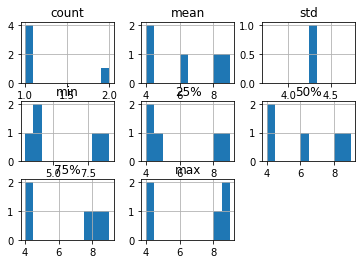

In [49]:
df1.groupby('A')['B'].describe()

Следующим методом для работы с таблицами рассмотрим метод drop, который позволяет удалять строки или столбцы. Для того, чтобы выбрать строку или столбец необходимо указать это в аргументе axis, где 0 - это удаление строк, а 1 удаление столбцов. Метод drop принимает название строки или столбца (или индексы) и удаляет их. Данный метод имеет аргумент inplace, так что без него в исходную таблицу изменения не внесутся.

In [51]:
# Удалим из таблицы столбец Functions без inplace
gtrd.drop('Function', axis = 1)

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,Caenorhabditis elegans
...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,Rattus norvegicus
18264,Hils1,NaN,0,0,0,D3ZZW6,Rattus norvegicus


In [52]:
gtrd

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus


In [53]:
# Удаление строки
gtrd.drop(0)

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans
5,R07E5.5,TF,WBGene00011113,T131594_2.00,0,0,NaN,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus


Если методы до этого были достаточно понятны, то следующий метод уже чуть сложнее. Это метод apply, который позволяет применить какую-либо функцию к выбранному столбцу или строкам. Т.е., если к примеру, вам необходимо как-то модифицировать все элементы в каком-то столбце, можно написать простую функцию lambda и передать ее методу apply. При этом возвращает он всега Series и не измяняет исходную таблицу, поэтому результат, чтобы его сохранить, следует записывать в отдельную переменную. Добавим подпись is it gene? к каждому названию гена в таблице

In [62]:
new_column = gtrd['Gene name'].apply(lambda x : str(x) + ' is it gene?')
new_column

0            che-1 is it gene?
1           ztf-26 is it gene?
2           ceh-89 is it gene?
3           dpy-20 is it gene?
4           hlh-32 is it gene?
                 ...          
18261        Ep300 is it gene?
18262          Nf1 is it gene?
18263       Cep192 is it gene?
18264        Hils1 is it gene?
18265    Serpina3k is it gene?
Name: Gene name, Length: 18266, dtype: object

Также метод apply имеет направления по которым работать, к примеру, по строкам или по столбцам, также как и в случае с drop с помощью аргумента axis. ЧТобы было нагляднее, рассмотрим пример с таблицей с числами. Получим сумму всех чисел в столбце. Сейчас будет немного интуитивный диссонанс - сложить все числа в каждом столбце, это применение apply() для строк, т.е. axis = 0. Почему так? Потому что в этом случае складываются значения именно строк, для каждого столбца. А вот чтобы получить сумму всех чисел для каждой строки - необходимо использовать axis=1, т.е. вычисление должно идти по столбцам, т.к. в этом случае, буду складываться все числа для каждой строки во всех столбцах. Звучит очень запутанно, но рассмотрев пример, все станет понятно

In [63]:
df1

,A,B,C
0,1,2,0
1,4,8,1
2,6,6,7
3,9,8,1
4,7,6,2
5,1,3,4


In [64]:
# Применение apply на строки
df1.apply(np.sum, axis = 0)

A    28
B    33
C    15
dtype: int64

In [65]:
# Применение apply на столбцы
df1.apply(np.sum, axis = 1)

0     3
1    13
2    19
3    18
4    15
5     8
dtype: int64

Следующим очень важным разделом при работе с данными является работа с пустыми значениями, то что обозначается как NaN или None. Для этого есть 2 метода isna и isnull. Вроде бы они похожи, но, к сожалению, некоторые пустые ячейки могут оказаться при проверке с isna не пустыми. Поэтому существует isnull который дополнительно проверяет все данные немного другим подходом. 

Интересный момент, если посмотреть тип данный NaN в Pandas то окажется, что это тип данных float, иногда может оказаться полезным при парсинге таблиц.

По своей сути isna и isnull делают одно и тоже и всех их аргументы идентичны, поэтому рассмотрим все на примере с isna, т.к. в нашей таблице значений, который isna не определяет нет. Что же делает isna? Он просто возвращает вам обратно таблицу, в которой все значения заменены на True или False. Если значение False - значит что данный элемент не NaN, а если True - значит, что в данной позиции элемент равен NaN.

In [66]:
gtrd.isna().head()

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False


Чтобы удалить значения NaN можно пройти циклом по таблице полученной isna, а можно воспользоваться методом dropna. У него есть аргумент how, который принимает 2 значения: all и any. all - удалить только в том случае, если все элементы строки или столбца имеют значение NaN, any - удалить все строки или столбцы если хотя бы 1 значение в них имеет значение NaN. Можно понять из объяснения, что данный метод также имеет аргумет axis, чтобы работать либо по строкам, либо по мтолбцам. Рассмотрим работу dropna с разными параметрами на примерах:

PS: Данный метод имеет аргумент inplace, т.е. все преобразования не отображаются в основной таблице

In [130]:
# Удаление с помощью how = 'all'
gtrd.dropna(how='all')

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie,Nem Column
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans,che-1 is it gene?
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans,ztf-26 is it gene?
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans,ceh-89 is it gene?
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans,dpy-20 is it gene?
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans,hlh-32 is it gene?
...,...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus,Ep300 is it gene?
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus,Nf1 is it gene?
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus,Cep192 is it gene?
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus,Hils1 is it gene?


In [67]:
#Удаление с помощью how = 'any'. Поумолчанию значение axis=0, поэтому удаляются все строки в которых хотя бы 1 элемент равен NoN
gtrd.dropna(how = 'any')

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
5400,CHD2,TF,0,T153706_1.02,0,O14647,'chromodomain helicase DNA binding protein 2 S...,Homo sapiens
5403,GTF3C2,TF,0,T153687_1.02,0,Q8WUA4,'general transcription factor IIIC subunit 2 S...,Homo sapiens
5406,PARP1,TF,0,T153695_1.02,0,P09874,'poly(ADP-ribose) polymerase 1 Source:HGNC Sym...,Homo sapiens
5408,SMC3,TF,0,T153685_1.02,0,Q9UQE7,'structural maintenance of chromosomes 3 Sourc...,Homo sapiens


In [68]:
#Удаление с помощью how = 'any' и axis = 1, удаляются все столбцы где есть хотя бы 1 NaN
gtrd.dropna(how = 'any', axis = 1)

,Specie
0,Caenorhabditis elegans
1,Caenorhabditis elegans
2,Caenorhabditis elegans
3,Caenorhabditis elegans
4,Caenorhabditis elegans
...,...
18261,Rattus norvegicus
18262,Rattus norvegicus
18263,Rattus norvegicus
18264,Rattus norvegicus


Также у dropna есть аргумет subset который позволяет съузить масштабы удаления NaN. Можно выбрать лишь несколько столбцов или строк и тем самым удалятся лишь строки (или столбцы), где NaN есть только в выбранных столбцах. Звучит тоже замысловато, рассмотрим на примере, где мы удалим только те строки, где значение GTRD_uniprot_id равно NaN

In [134]:
gtrd.dropna(how = 'any', subset=['GTRD_uniprot_id'])

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie,Nem Column
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans,che-1 is it gene?
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans,ztf-26 is it gene?
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans,ceh-89 is it gene?
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans,dpy-20 is it gene?
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans,hlh-32 is it gene?
...,...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus,Ep300 is it gene?
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus,Nf1 is it gene?
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus,Cep192 is it gene?
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus,Hils1 is it gene?


Еще одна возможность работы с NaN - это не удаление, а замена их на что-то другое. Это делает легко с помощью метода fillna, которому передается на что заменить NaN. Данный метод также поддерживает аргумент inplace. Заменим все NaN на 'Unknown'

In [69]:
gtrd.fillna('Unknown')

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,Unknown,Caenorhabditis elegans
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,Unknown,Caenorhabditis elegans
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,Unknown,Caenorhabditis elegans
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,Unknown,Caenorhabditis elegans
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,Unknown,Caenorhabditis elegans
...,...,...,...,...,...,...,...,...
18261,Ep300,Unknown,Unknown,Unknown,Unknown,Q91XT0,Unknown,Rattus norvegicus
18262,Nf1,Unknown,Unknown,Unknown,Unknown,P97526,Unknown,Rattus norvegicus
18263,Cep192,Unknown,Unknown,Unknown,Unknown,Q7TP06,Unknown,Rattus norvegicus
18264,Hils1,Unknown,0,0,0,D3ZZW6,Unknown,Rattus norvegicus


In [71]:
# Ну и в качестве примера использование isnull, можете сравнить с таблицей isnan
gtrd.isnull().head()

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False


Как модифицировать и удалять значения DataFrame вроде бы разобрались, что делать с NaN тоже. Теперь остались последние важные моменты: Как добавлять новые столбцы и можно ли как-то объединять DataFrame между собой, если, к примеру, у вас есть несколько таблиц и надо их слить в одну. Начнем с добавления столбцов. Это делается довольно просто, прописываем  
DataFrame['Название нового столбца'] = новый столбец

Столбец добавится автоматически в конец таблицы

In [75]:
gtrd['Nem Column'] = new_column
gtrd

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie,Nem Column
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans,che-1 is it gene?
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans,ztf-26 is it gene?
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans,ceh-89 is it gene?
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans,dpy-20 is it gene?
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans,hlh-32 is it gene?
...,...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus,Ep300 is it gene?
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus,Nf1 is it gene?
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus,Cep192 is it gene?
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus,Hils1 is it gene?


Есть чуть более красивый способ с помощью метода assign. Приэтом assing возвращает копию таблицы, а не модицифирую исходную таблицу, в отличии от прямого назначения. Также ему можно передавать сразуже несколько столбцов. При создании с помощью asing название столбца не надо включать в кавычки, но при этом нельзя допускать пробельные символы в названии столбцов

In [78]:
gtrd.assign(new_column1 = new_column)

,Gene name,Type,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie,Nem Column,new_column1
0,che-1,TF,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans,che-1 is it gene?,che-1 is it gene?
1,ztf-26,Cofactor,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans,ztf-26 is it gene?,ztf-26 is it gene?
2,ceh-89,TF,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans,ceh-89 is it gene?,ceh-89 is it gene?
3,dpy-20,TF,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans,dpy-20 is it gene?,dpy-20 is it gene?
4,hlh-32,TF,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans,hlh-32 is it gene?,hlh-32 is it gene?
...,...,...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus,Ep300 is it gene?,Ep300 is it gene?
18262,Nf1,NaN,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus,Nf1 is it gene?,Nf1 is it gene?
18263,Cep192,NaN,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus,Cep192 is it gene?,Cep192 is it gene?
18264,Hils1,NaN,0,0,0,D3ZZW6,NaN,Rattus norvegicus,Hils1 is it gene?,Hils1 is it gene?


Чтобы вставить столбец на нужную вам позицию, стоит воспользоваться методом insert, который принимает позицию, название и данные для столбца на вход

In [87]:
# Вставим столбец на 3 позицию в нашу таблицу
gtrd.insert(2, 'Column in midle', new_column)
gtrd

,Gene name,Type,Column in midle,Animal_db,Cis_bp,TF_class_id,GTRD_uniprot_id,Function,Specie,Nem Column
0,che-1,TF,che-1 is it gene?,WBGene00000483,T131550_2.00,0,Q966L8,NaN,Caenorhabditis elegans,che-1 is it gene?
1,ztf-26,Cofactor,ztf-26 is it gene?,WBGene00010137,T131589_2.00,0,A5JYU2,NaN,Caenorhabditis elegans,ztf-26 is it gene?
2,ceh-89,TF,ceh-89 is it gene?,WBGene00009231,T224656_2.00,0,0,NaN,Caenorhabditis elegans,ceh-89 is it gene?
3,dpy-20,TF,dpy-20 is it gene?,WBGene00001079,T027893_2.00,0,0,NaN,Caenorhabditis elegans,dpy-20 is it gene?
4,hlh-32,TF,hlh-32 is it gene?,WBGene00013665,T046305_2.00,0,0,NaN,Caenorhabditis elegans,hlh-32 is it gene?
...,...,...,...,...,...,...,...,...,...,...
18261,Ep300,NaN,Ep300 is it gene?,NaN,NaN,NaN,Q91XT0,NaN,Rattus norvegicus,Ep300 is it gene?
18262,Nf1,NaN,Nf1 is it gene?,NaN,NaN,NaN,P97526,NaN,Rattus norvegicus,Nf1 is it gene?
18263,Cep192,NaN,Cep192 is it gene?,NaN,NaN,NaN,Q7TP06,NaN,Rattus norvegicus,Cep192 is it gene?
18264,Hils1,NaN,Hils1 is it gene?,0,0,0,D3ZZW6,NaN,Rattus norvegicus,Hils1 is it gene?


Ну и последний раздел по работе с таблицами в pandas - это как объединять несколько таблиц. Для этого создадим новвы таблицы df5 и df6

In [3]:
data1 = np.random.randint(10, size=(3,3))
data2 = np.random.randint(10, size=(3,3))

df5= pd.DataFrame(data1, columns = list('ABC'))
df6 = pd.DataFrame(data2, columns = list('ABC'))

print(df5, end='\n\n')
print(df6)

   A  B  C
0  1  7  9
1  1  1  0
2  1  8  4

   A  B  C
0  5  7  6
1  1  1  6
2  3  5  9


Теперь добавим к df5 df6. Для этого у DataFrame существует метод append. Он работает как метод append у списков, т.к. если вспомнить как выглядит DataFrame в виде списков, то это список, со вложенными списками, как и список numpy, где каждый вложенный список - это строка, а каждый элемент списка - это значение столбца. Т.е. применяя append вы просто псоледовательно добавляете в конец списка со списка df5, вложенные списки из df6, проще говоря, вы просто добавляете строки из df6 в конец df5. Рассмотрим пример:

In [4]:
df5.append(df6)

,A,B,C
0,1,7,9
1,1,1,0
2,1,8,4
0,5,7,6
1,1,1,6
2,3,5,9


Тут довольно хорошо видно благодаря индексам, где идет df5 и где идет df6. При этом метод append не изменяет исходную таблицу, а создает новую с результатом объединения. Чтобы сделать новые индексы, а не использовать индексы от каждого DataFrame, можно использовать аргумент ignore_index, тогда колонка индексов заменится на новую, автоматически сгенерированную для DataFrame.

In [5]:
df5.append(df6, ignore_index=True)

,A,B,C
0,1,7,9
1,1,1,0
2,1,8,4
3,5,7,6
4,1,1,6
5,3,5,9


Также можно с помощью append добавлять и DataFrame с другим списком столбцов, и они просто автоматически добавятся, заменив для не совпадающих столбцов значения на NaN

In [6]:
df7 = pd.DataFrame(data2, columns = list('EFG'))

df5.append(df7)

,A,B,C,E,F,G
0,1.0,7.0,9.0,NaN,NaN,NaN
1,1.0,1.0,0.0,NaN,NaN,NaN
2,1.0,8.0,4.0,NaN,NaN,NaN
0,NaN,NaN,NaN,5.0,7.0,6.0
1,NaN,NaN,NaN,1.0,1.0,6.0
2,NaN,NaN,NaN,3.0,5.0,9.0


Ну и заключительный метод, для объединения DataFrame - это join. Он позволяет добавить один к DataFrame к другому не как строки в случае с append,а как столбцы с правой стороны

In [7]:
df5.join(df7)


,A,B,C,E,F,G
0,1,7,9,5,7,6
1,1,1,0,1,1,6
2,1,8,4,3,5,9


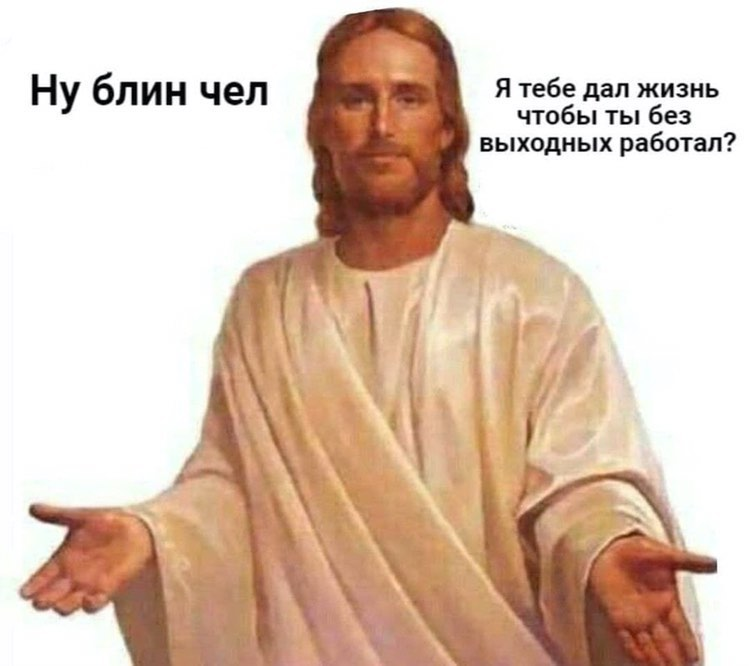

### Визуализация данных с помощью pandas

Pandas поддерживает простую визуализацию данных в самом себе, основанную на библиотеке matplotlib. Тут будет ряд самых простых примеров, так как в следующем разделе будет чуть подробнее разобран matplotlib и как визуализировать данные из pandas с его помощью

<AxesSubplot:>

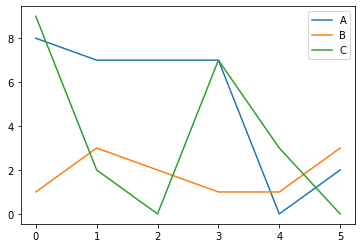

In [51]:
# Простой график для каждого столбца
df1.plot()


array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>, <AxesSubplot:>]], dtype=object)

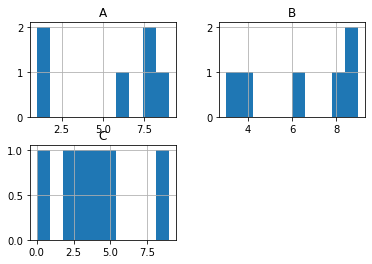

In [10]:
# Простая гистрограмма с распределением чисел в каждом столбце
df1.hist()

In [139]:
# Это конечно не гистограмма, но функция может пригодиться при построении графиков. Рассчет среднего для каждого из столбцов
df1.mean()

A    5.666667
B    5.000000
C    2.500000
dtype: float64

In [168]:
# Еще одна удобная фича это работа с временными рядами. Рассмотрим изменения на нефть с 2002 по декабрь 2020
prices = pd.read_table('sorted_prices.txt', index_col = 'Месяц')
prices

,"Цена, USD"
Месяц,
2002-01-01,19.2750
2002-02-01,19.9750
2002-03-01,24.1500
2002-04-01,25.6700
2002-05-01,25.9200
...,...
2020-08-01,45.0150
2020-09-01,41.9200
2020-10-01,42.0775


<AxesSubplot:xlabel='Месяц'>

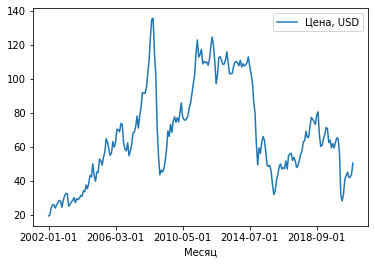

In [169]:
prices.plot()

Предыдущий график выглядел не сильно аккуратно и удобно. Поэтому у Pandas есть фича DatatimeIndex, которая позволяет преобразовывать индексы в отдельный вид временных индексов и при отрисовке matplotlib понимает, что это временной промежуток и уже строит графики гораздо аккуратнее и понятнее

In [171]:
prices = prices.set_index(pd.DatetimeIndex(prices.index))
prices

,"Цена, USD"
Месяц,
2002-01-01,19.2750
2002-02-01,19.9750
2002-03-01,24.1500
2002-04-01,25.6700
2002-05-01,25.9200
...,...
2020-08-01,45.0150
2020-09-01,41.9200
2020-10-01,42.0775


<AxesSubplot:xlabel='Месяц'>

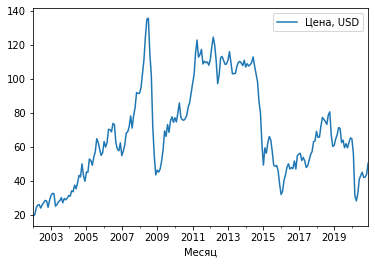

In [172]:
prices.plot()

<AxesSubplot:xlabel='Месяц'>

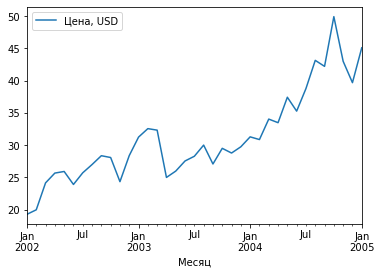

In [173]:
# Также можно очень удобно по датам делать временные срезы
prices['2002-01-01':'2005-01-01'].plot()

## Matplotlib и Seaborn - большие возможности для визуализация данных



Matplotlib и Seaborn - это две очень мощные библиотеки для визуализации. Они имеют огромное количество возможностей, настроек для графиков, можно часами изучать документацию и находить что-то новое. В данном разделе будет лишь только базовая часть, которая необходима для какого-то базового понимания что такое графики в python, как их строить и чтобы в дальнейшем было проще учиться новым возможностям. Крайне рекомендую обращаться к документации и к это статье на хабре (https://habr.com/ru/post/468295/). В этой статье есть практически все, что необходимо для работы с визуализацией, с примерами и кодом. Так что если не знаете, как построить определенный график - проглядите статью, в ней вы точно найдете что-то нужное для вашего случая.

Вся документация по Matplotlib и Seaborn:  

- документация по Matplotlib (https://matplotlib.org/)
- туториалы от разработчиков (https://matplotlib.org/stable/tutorials/index.html)
- документация по Seaborn (https://seaborn.pydata.org/)
- туториалы от разработчиков (https://seaborn.pydata.org/tutorial.html)

### Matplotlib pyplot 

Начнем с простого графика в Matplotlib. Для этого необходимо импортировать из библиотеки Matplotlib модуль pyplot. Ему достаточно передать данные для одной из осей, и втору он создаст автоматически. Поумолчанию если просто передать список для графика, то он передаст данные в переменную y.

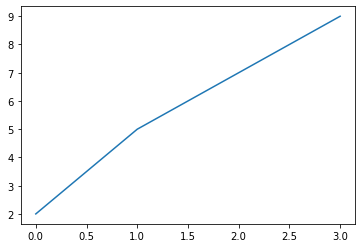

In [12]:
import matplotlib.pyplot as plt
# Самый простой график. Передаем

plt.plot([2, 5, 7, 9]) 
plt.show()

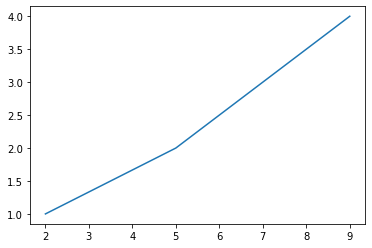

In [4]:
# Передача графику данных для x и y
plt.plot([2, 5, 7, 9], [1, 2, 3, 4])
plt.show()

Если вам не нужна линия, а нужны точки, то это можно всегда обозначить буквой 'o'. Также можно делать пунктирные линии '--', '-.' линии, трейугольники, квадраты и еще кучу всего. Перед символом вида графика необходимо обозначить цвет. К примеру, чтобы получить график из зеленых точек необходимо передать 'go'. А чтобы просто изменить цвет вашей линии с синей на зеленую достаточно просто указать 'g'. Цветов тоже очень большое множество, они также могут передаваться через аргумент color, куда можно передавать и кодировку rgb, к примеру.

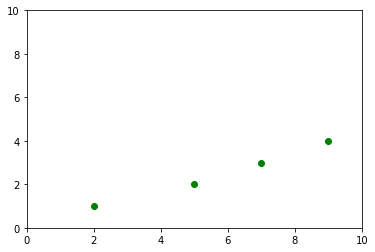

In [18]:
# График из зеленых точек
plt.plot([2, 5, 7, 9], [1, 2, 3, 4], 'go')
plt.axis([0, 10, 0, 10])

plt.show()

Конечно, график без осей выглядит как-то не так. И конечно, у pyplot есть возможность настраивать эти параметры (вообще тут можно как угодно кастомизировать графики, главное понять что конкретно необходимо). Для настройки осей у pyplot есть методы xlabel и ylable, а для подписи самого графика есть метод title. Нарисуем косинусоиду с использованием библиотеки numpy.

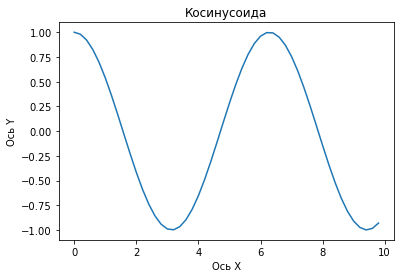

In [31]:
# График с подписями осей

x = np.arange(0, 10, 0.2)
y = np.cos(x)

plt.plot(x, y)

plt.title('Косинусоида')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

plt.show()

Теперь немного усложним задачу. Что делать, если нужно, к примеру отобразить не одину линию, а к примеру две? Есть простой способ, просто сделать два графика plot. matplotlib сам все поймет, подумает и нарисует так, как вам необходимо. И даже цвета поменяет. Это простой и быстрый способ.

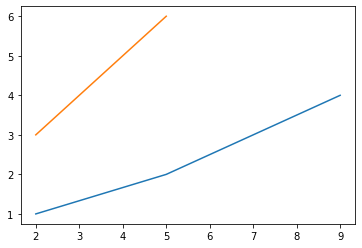

In [18]:
plt.plot([2, 5, 7, 9], [1, 2, 3, 4])
plt.plot([2, 3, 4, 5], [3, 4, 5, 6])
plt.show()

Есть чуть более сложный способ, который в будущем даст гораздо ьольше возможностей для настройки. Это способ с использованием модуля plot figure. Т.е. сначала создается поле определенного размера, тем самым позволяя легко варьировать размеры графика. Затем добавляются оси с помощью метода figure add_axes, таким образом получается, что можно создать оси разного размера и преобразовывать оси для каждого графика по отдельности. Методу add_axes достаточно передать список из 4 чисел, которые показывают размер осей в отношении к самому графику [left, bottom, width, height]. В дальнейшем нам это еще пригодится, сейчас рассмотрим самый просто способ нарисовать график с помощью axes. Чтобы построить график с пмощью axes нужно просто вызвать метод plot у самого axes и последовательно добавить туда ваши графики. Метод plot у axes работает точно также как и метод plot у модуля pyplot.
Также у axes есть метод legend, который позволяет добавить легенду для графика. Ему нужно просто передать список с подписями для каждого графика в той последовательности, в который вы добавляли графики в axes. Также у legend есть аргумент loc, где можно настраивать положение легенды на графике. Самый простой способ это loc='best' и выберется наиболее подходящее место для легенды на графике автоматически. Довольно часто этого хватает для красивого графика

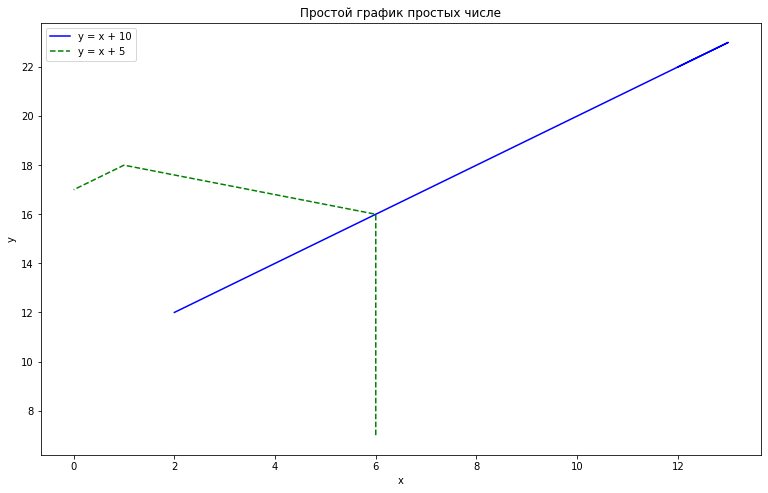

In [23]:
# Создаем поле графика
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([1,1,1,1])

#Создаем переменные для осей x и y
x = np.random.randint(18, size=(4))
x1 = np.random.randint(10, size=(4))
y = [y + 10 for y in x]
y1 = [y + 5 for y in x]

# Добавляем графики в оси
axes.plot(x, y, 'b')
axes.plot(x1, y1, 'g--')

# Настройка "красивого" визуала. Подписи осей, подписи графиков
axes.set_xlabel('x') 
axes.set_ylabel('y')
axes.set_title('Простой график простых числел') 
axes.legend(['y = x + 10', 'y = x + 5'], loc='best')

plt.show() # вывести график на экран

Переходим к дальнейшему усложнению графиков. Теперь рассмотрим чуть более реальное использование axes и зачем они вообще нужны. К примеру, вам надо построить 2 графика, но не так, чтобы они были рядом с друг другом, а чтобы это были 2 отдельных графика, где 1 график находится внутри второго. В таком случае, просто создадим 2 оси, axes1 и axes2 и сделаем эти оси разного размера таким образом, чтобы оба графика влезли (честно, числа подбираются на глаз, поэтому может получиться не сразу) и просто повторим процедуру как и на прошлом графике, только теперь добавим большой график в бОльшую ось, а который хотим сделать вложенным в малую.

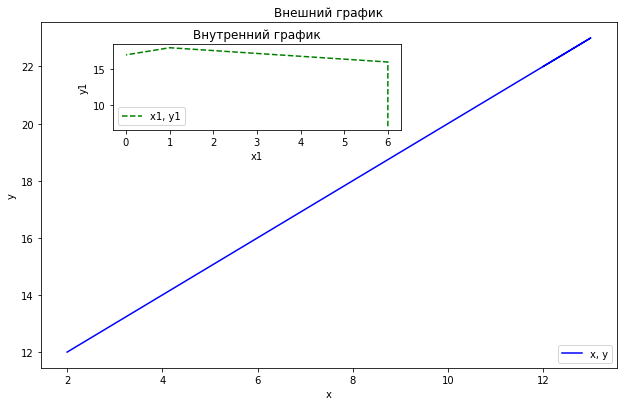

In [29]:
fig = plt.figure(figsize=(10, 6))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # основной график

axes2 = fig.add_axes([0.2, 0.65, 0.4, 0.2]) # внутренный график

# Основной график
axes1.plot(x, y, 'b')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Внешний график')
axes1.legend(['x, y'], loc=4)

# Вложенный график
axes2.plot(x1, y1, 'g--')
axes2.set_xlabel('x1')
axes2.set_ylabel('y1')
axes2.set_title('Внутренний график')
axes2.legend(['x1, y1'], loc='best')
plt.show()

И еще один способ использования axes который мы рассмотрим, это использования их для создания нескольких графиков или subplots. В дальнешем мы рассмотрим чуть более простой способ создания sublots, но с использованием axes можно получить чуть больше возможностей. Чтобы создать subplots с помощью axes, необходимо 3 элемента: это создать несколькое графиков, для каждого создать само поле и создать оси на этом поле. Звучит сложно, но делается это очень просто. Очень удобная особенность Python и matplotlib в частности, в том, что можно передавать несколько переменных и тем самым создавать в 1 строку все, что нам необходимо за счет кортежей. Для этого слева достаточно прописать кортеж с нужными переменными и прописать функцию которая выдаст результат и сама запишет последовательно необходимые вам результаты. Поэтому воспользовавшись методом pyplot sublots, создадим поле из 1 строки и 2 колонок (т.е. 1 строка в которой будет 2 графика). Для этого воспользуемся аргументами nrows и ncols. В общем виде это будет выглядеть так: fig, axes = plt.subplots(). При такой записи не надо отдельно прописывать создание объекта графика и осей, они создадутся сразу же. Так мы создаем несколько графиков (а именно 2), то axes - это список, в котром лежат оси для первого и второго графика, т.е. чтобы обратиться к примеру, к осям первого графика нужно просто получить их из списка: axes[0]. Рассмотрим пример, чтобы стало понятнее

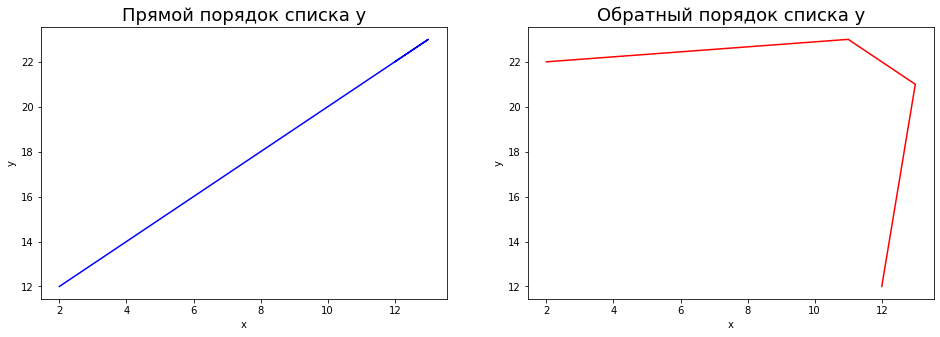

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

axes[0].plot(x, y, 'b')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Прямой порядок списка y', fontsize=18)

axes[1].plot(x, y[::-1], 'r')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Обратный порядок списка y', fontsize=18)

plt.show()

### Matplotlib + pandas

Теперь перейдем к непосредственной работе matplotlib и DataFrame. Для этого загрузим таблицу Pandas с результатами вакцинаций раздичными вакцинами с конца 1997 по 2020 годы во всем мире и достанем оттуда данные по вакцинированию вакциной БЦЖ и pol3 в России. Также преобразуем сразуже колонку год во временной индекс

In [5]:
import pandas as pd

# Чтение таблицы
vac = pd.read_table('../files_and_images/vac_bsg.txt', '\t', encoding='cp1252')

#Полчаем данные по вакцинированию БЦЖ в России

bsg_russia_v = vac[(vac['Vaccine'] == 'bcg') & (vac['Country'] == 'Russian Federation')]

#Полчаем данные по вакцинированию БЦЖ в России
bsg_russia = vac[(vac['Vaccine'] == 'bcg') & (vac['Country'] == 'Russian Federation')]

# Делаем колонку года индексом
bsg_russia.index = bsg_russia['Year']
# Преобразуем ее во временной индекс
bsg_russia.set_index(pd.DatetimeIndex(bsg_russia.index))
# Удаляем теперь колнку года, а также удалим все года когда не было сведений о вакцинации
bsg_russia.drop('Year', inplace = True, axis=1)
bsg_russia.dropna(inplace = True, axis=0, how='any', subset=['ChildrenVaccinated'])
bsg_russia.dropna(inplace = True, axis=0, how='any', subset=['ChildrenInTarget'])
bsg_russia

# Повторим тоже само для вакцинации pol3
pol3_russia = vac[(vac['Vaccine'] == 'pol3') & (vac['Country'] == 'Russian Federation')]
pol3_russia.index = pol3_russia['Year']
pol3_russia.set_index(pd.DatetimeIndex(pol3_russia.index))
pol3_russia.drop('Year', inplace = True, axis=1)
pol3_russia.dropna(inplace = True, axis=0, how='any', subset=['ChildrenVaccinated'])
pol3_russia.dropna(inplace = True, axis=0, how='any', subset=['ChildrenInTarget'])
bsg_russia.head()


,Country,ISOCountryCode,Vaccine,WUENIC,WUENICPreviousRevision,GradeOfConfidence,AdministrativeCoverage,GovernmentEstimate,ReportedCoverage,ChildrenVaccinated,ChildrenInTarget,BirthsUNPD,SurvivingInfantsUNPD,Comment
Year,,,,,,,,,,,,,,
1999,Russian Federation,rus,bcg,96,96.0,1,96.0,NaN,96.0,1035198.0,1080467.0,1310266,1284377,Estimate based on reported administrative data...
2000,Russian Federation,rus,bcg,96,96.0,1,96.0,96.0,96.0,1037386.0,1077958.0,1327371,1302330,Estimate based on coverage reported by nationa...
2001,Russian Federation,rus,bcg,96,96.0,1,96.0,96.0,96.0,1129145.0,1169463.0,1354942,1330809,Estimate based on coverage reported by nationa...
2002,Russian Federation,rus,bcg,97,97.0,1,97.0,97.0,97.0,1203901.0,1245631.0,1390517,1367350,Estimate based on coverage reported by nationa...
2003,Russian Federation,rus,bcg,97,97.0,2,97.0,NaN,97.0,1271023.0,1313010.0,1431484,1409326,Estimate based on reported administrative data...


Теперь построим простой график с использованием DataFrame. Так как мы постепенно идем по усложнению графиков, то тут заодно продемонсрируем возможности одно из аргументов axes - fontdict. Данный аргумент принимает словарь в котором можно передавать различные параметры, такие как размер, шрифт, цвет текста и его тип. Если нет необходимости настраивать все параметры, а только какой-то один, то к ним можно обратиться непосредственно как к аргументу. К примеру, чтобы изменить размер шрифта достаточно просто прописать fontsize и передать ему размер шрифта.  
Отобразим на графике количество вакцинированных детей и количество детей которых должны были вакцинировать. Для этого просто возьмем столбец ChildrenVaccinated и ChildrenInTarget, а также столбец индексов из нашего DataFrame и просто передадим их самому простому plot

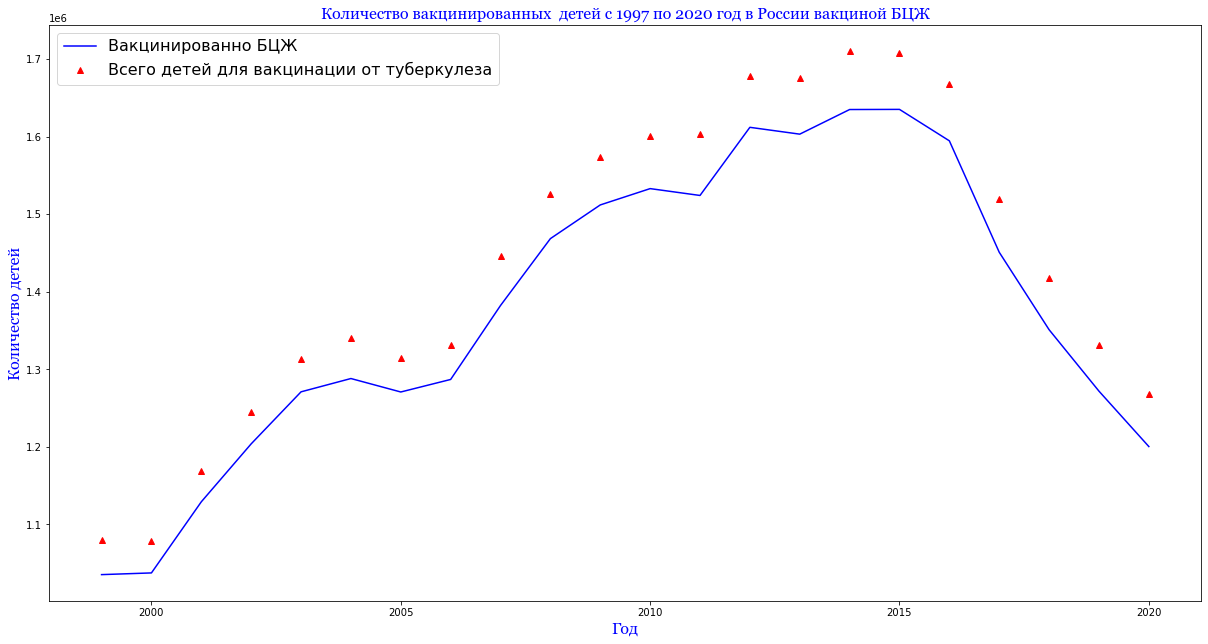

In [44]:
# Создаем поле графика
fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([1,1,1,1])



#Создаем переменные для осей x и y
y = bsg_russia['ChildrenVaccinated']
y1 = bsg_russia['ChildrenInTarget']
x = bsg_russia.index

# Создание самого графика на поле графика
axes.plot(x, y, 'b')
axes.plot(x, y1, 'r^')

# Настройка "красивого" визуала. Подписи осей, подписи графиков

font = {'family': 'Georgia', # это шрифт
        'color':  'blue', # Цвет шрифта
        'weight': 'normal', # тип шрифта (жирный, полужирный и т.п.)
        'size': 16, # Размер Шрифта
        }

axes.set_xlabel('Год', fontdict=font) 
axes.set_ylabel('Количество детей', fontdict=font)
axes.set_title('Количество вакцинированных  детей с 1997 по 2020 год в России вакциной БЦЖ', fontdict=font) 
axes.legend(['Вакцинированно БЦЖ', 
             'Всего детей для вакцинации от туберкулеза'
            ], 
            loc=2,
            fontsize=16
           )

plt.show() # вывести график на экран

Следующим интересным способ отображения графиков является совмещение разных типов графиков. К примеру, на графике сверху не очень хорошо видно, а где точка каждого года? Для этого можно построить, конечно, 2 одинаковых графика и один сделать линией, а второй точками, но есть и более красивый и элегантный способ с использованием уже не plot, а scatter. scatter - это точечные графики, частно используемые для визуализации различных групп в выборке.  
Чтобы построить такой график воспользуемся в этот раз не plot у pyplot, а просто методом plot у DataFrame, но попробуем его уже немного кастомизировать. Т.к. метод plot у DataFrame это просто быстрый метод вызова plot из pyplot, то работает он точно также и на нем не будет заострять внимание, а вот про scatter чуть подробнее. Чтобы отобразить то, что нам необходимо, ему достаточно передать также как и обычному графику x и y. Также у него есть аргумент s - который позволяет изменять размер точек на графике и аргумент marker, который может сделать точки треугольниками, к примеру. Ну и все стандартные аргументы, такие как xlabel, ylabel и просто label у него также присутсвуют.

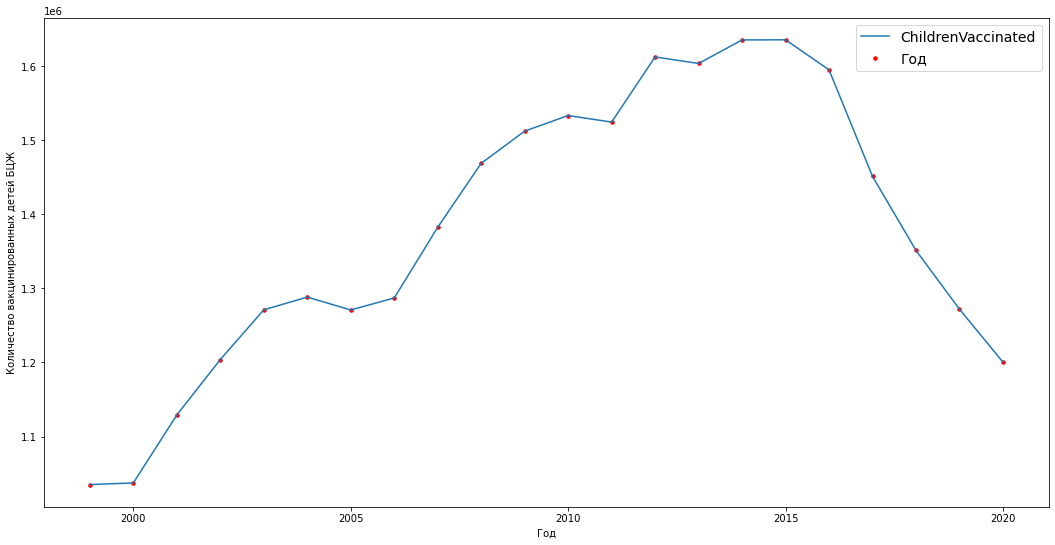

In [47]:
bsg_russia['ChildrenVaccinated'].plot(xlabel = 'Год', ylabel = 'Количество вакцинированных детей БЦЖ', figsize=(18,9))
xA = bsg_russia.index.values
yA = bsg_russia['ChildrenVaccinated'].values
plt.scatter(xA, yA, color='r', s=12, marker='o', label = 'Год')
plt.legend(loc='best', prop={'size': 14})
plt.show() 

Последнее что рассмотрим в работе графиков Matplotlib и Pandas это еще немного типов графиков. Если нет необходимости к примеру оценивать во врменно промежутке какие-то данные, а необходимо сравнить 2 типы данных между собой отличным выбором будут графики bar. Они позволяют визуально сравнить какие-то количественные данные. К примеру, сравним среднее количество детей вакцинированных БЦЖ и pol3 за все время. Для этого построим графики subplot, чтоб не делать 2 отдельный графика, а показать это сразу же на одном. Посмтроим график bar и график scatter, просто чтобыезе раз на него посмотреть.  

Для графика bar необходимо просто передать подписи ваших столбцов на графики, и значения для кажого столбца. Для этого создадим 2 списка names и values. Собственно это и все, что нужно сделать для построения такого графика. График scatter, кстати, можно построить тоже с помощью таких переменных. В таком случае matplotlib сам поймет, что ему переданы текстовые значения и модифицирует график.  

Теперь немного про то, как построим subplot. Ранее уже приводился пример subplot с использованием axes. Но использование axes далеко не всегда нужно и для быстрого создания subplot достаточно просто создать график с помощью plt.figure, а дальше просто написать plt.subplot(1,2,1) в случае, если у вас предполагается 2 графика в одной строке. Что значат эти цифры? Первая это количество строк, вторая количество столбцов, а третья, это какой по счету график, который будет следовать после объявления subplot. После строки plt.subplot(1,2,1) просто прописывается необходимый вас график, а затем прописывается plt.subplot(1,2,2) - который показывает Python-у что тут уже начинается следующий подграфик. Вот и все. Звучит немного замудренно, но на примере будет гораздо понятнее. Также при работе с sublot последным методом будет subplots_adjust, который позволяет регулировать расстояние между графиками повысоте и ширине, чтобы, к примеру, подписи осей одного графика не залазили на другой.

Также, скорее всего, к этому момента появился довольно правильный вопрос - графики это хорошо, а как графики созранять то? Все довольно просто, для этого используется метод savefig, которому достаточно передать название файла и расширение. Также у него есть очень полезный аргумент dpi который позволяет сохранять графики в очень хорошем качестве.

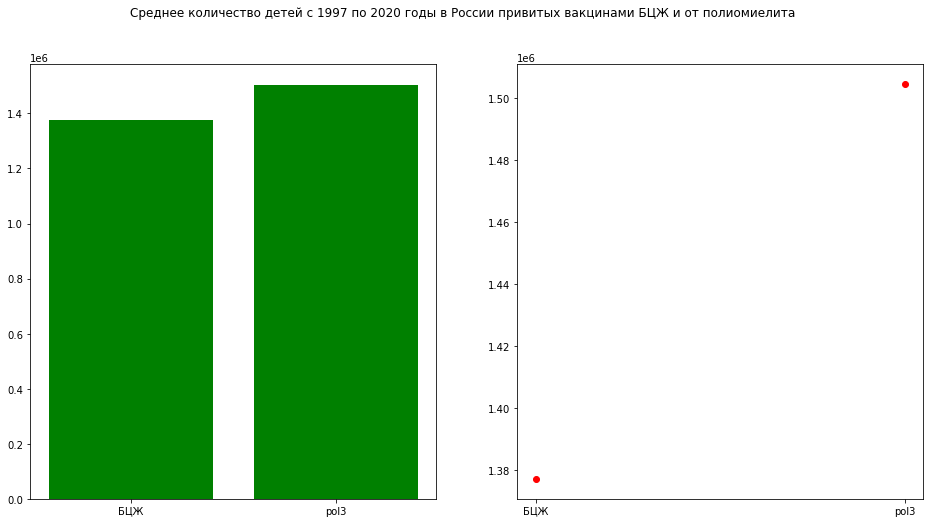

In [50]:
y2 = pol3_russia['ChildrenVaccinated']
names = ['БЦЖ', 'pol3']
values = [y.mean(), y2.mean()]

#Создаем график
plt.figure(figsize=(16, 8))
#Начало первого подграфика
plt.subplot(1,2,1)
# График bar
plt.bar(names, values, color='g')
# Начало второго подграфика
plt.subplot(1,2,2)
# График bar
plt.scatter(names, values, color='r')
# Метод suptitle в отличии от title позволяет сделать графикам общий заголовок
plt.suptitle('Среднее количество детей с 1997 по 2020 годы в России привитых вакцинами БЦЖ и от полиомиелита')

# Зададим растояние между графиками
plt.subplots_adjust(wspace=0.2)
#Сохраним график в формате png
plt.savefig('bgsVsPol3.png', dpi = 600)

plt.show()


### Seaborn + pandas
Seaborn это еще одна библиотека для визуализации, которая сделана на основе Matplotlib, при этом она направлена еще больше на работу именно с объектами данных Pandas. Как пример, у sns сть свой метод для чтения файлов, который сразуже преобразует их в таблицу Pandas, но это уже на любителя. Мы начнем рассматривать seaborn также с самого базового графика - lineplot. Это аналог plot у pyplot в matplotlib. Перед тем как начать работать, настроим наши графики так, чтобы они все были одного размера. Это делается через sns.set которому в агрумет rc передается словарь с разичными характеристиками. ДЛя того чтобы все графики были большие, необходимо просто в rc передать ключ figure,figsize, а значение - размер ваших будующих графиков.  
Сам же по себе lineplot строится немного по-другому.Ему передается аргумент data - это вся ваша таблица, с которой вы бедете работать. А после этого передаются уже аргументы x и y просто написав там название столбцов. Seaborn сам все распарсит, достанет и вставит в график

<AxesSubplot:xlabel='Year', ylabel='ChildrenVaccinated'>

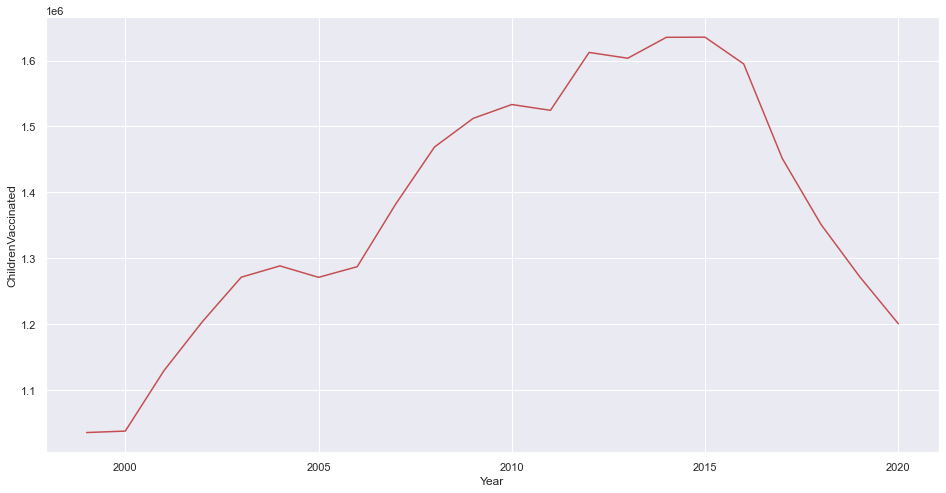

In [62]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16, 8)})
sns.set_style("darckgrid")

sns.lineplot(data=bsg_russia_v, x="Year", y="ChildrenVaccinated", color='r')


Следующим типом графиков, которые рассмотрим это уже знакомые графики bar. Их тоже можно строить в seaborn, а еще они получаются довольно яркие и красивые (хотя это, конечно, уже на любителя). В отличии от bar, которые мы строили в matplotlib тут мы построим график bar для каждого года, т.е. визуально отобразим количественные изменения вакцинированных детей. Строится этот график опять же очень просто и также как и гарфик lineplot: передаем ему аргумент data, x, y и наслаждаемся результатом.

<AxesSubplot:xlabel='Year', ylabel='ChildrenVaccinated'>

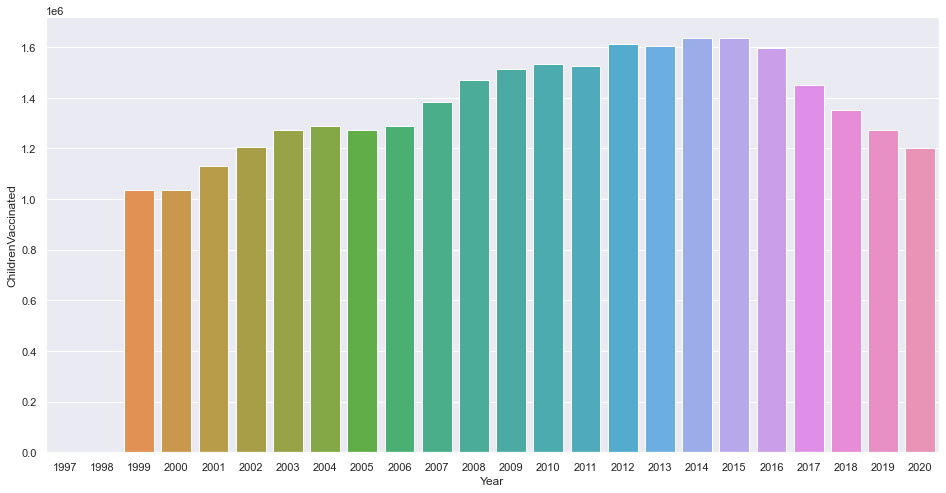

In [42]:
sns.barplot(data=bsg_russia_v, x="Year", y="ChildrenVaccinated")



 Также гистограмму можно отобразить в горизонтальном виде, иногда это может быть удобнне. При этому главное не забыть поменять оси местами

<AxesSubplot:xlabel='ChildrenVaccinated', ylabel='Year'>

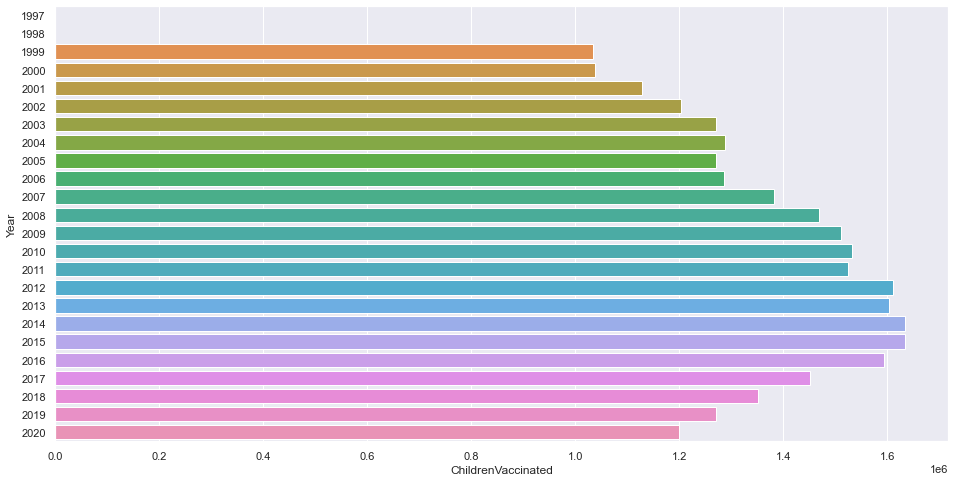

In [43]:
sns.barplot(data=bsg_russia_v, y="Year", x="ChildrenVaccinated", orient='h')

Довольно удобным аргументом при построении графиков в seaborn являет hue - в него передается столбец, по которому следует разделять данные между собой, тем самым ом автоматически разделяет их по цвету и создает для них легенду. Попробуем назначить столбцов hue столбец Vaccine, в которой лишь 1 признак.

<AxesSubplot:xlabel='ChildrenVaccinated', ylabel='Year'>

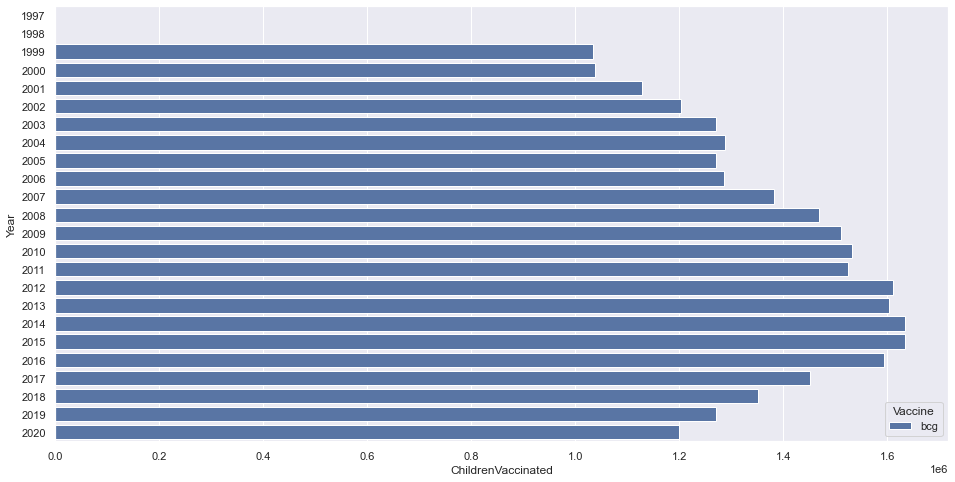

In [44]:
sns.barplot(data=bsg_russia_v, y="Year", x="ChildrenVaccinated", hue='Vaccine', orient='h')

Теперь опять же рассмотрим subplots. Т.к. seaborn сделан на базе mtplotlib то его легко можно вписывать в графики созданные через pyplot. Даже можно на одном графике отобразить график plot и inline просто в 2 стрчки. И поэтой причине, создание subplots в seaborn ничем не отличается от такового в matplotlib. Также графики seaborn можно записывать в axes matplotlib и не будет никаких трудностей.

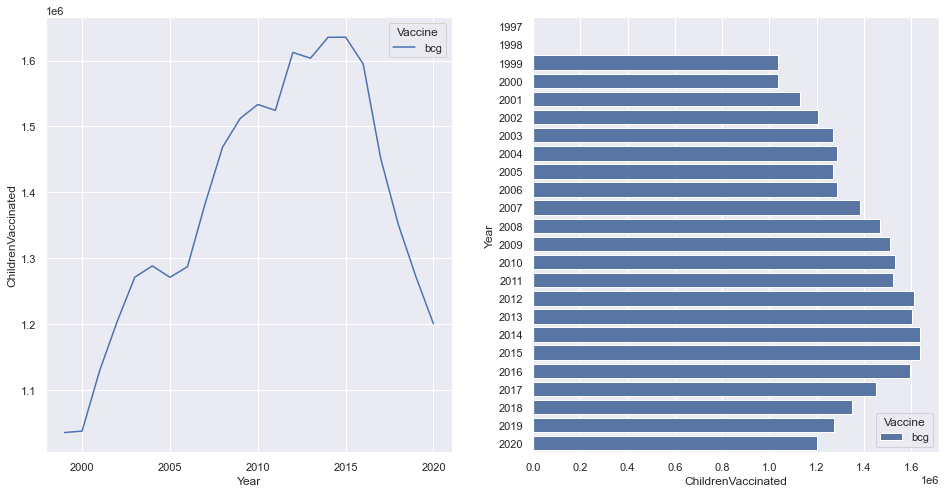

In [55]:
# subplots с помощью seaborn
plt.subplot(1, 2, 1)
sns.lineplot(data=bsg_russia_v, x="Year", y="ChildrenVaccinated", hue='Vaccine')
plt.subplot(1, 2, 2)
sns.barplot(data=bsg_russia_v, y="Year", x="ChildrenVaccinated", hue='Vaccine', orient='h')
plt.subplots_adjust(wspace=0.2)

Последним графиком, который хочется продемонстрировать являются тепловые карты. Это очень популярный тип графика, когда у вас есть необходимость оценить влияние нескольких факторов на другой. Для этого необходимо построить pivot_table в pandas. Думаю стоит объяснить что это вообще такое и зачем оно нужно, т.к. данные графики действительно очень востребованы, а самое главное наиболее адекватно они строятся именно с помощью seaborn.

<AxesSubplot:xlabel='ChildrenInTarget', ylabel='BirthsUNPD'>

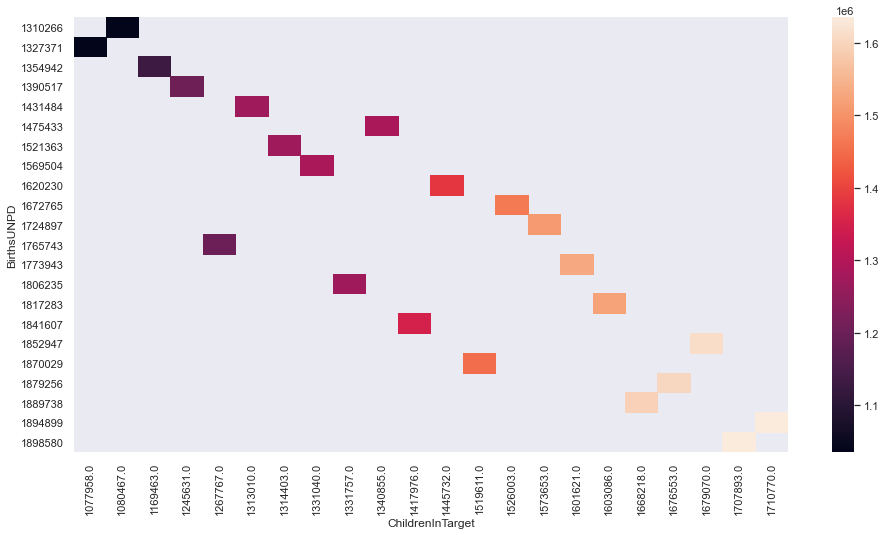

In [70]:
pivot = bsg_russia_v.pivot_table(
    index=['BirthsUNPD'],
    columns=['ChildrenInTarget'],
    values='ChildrenVaccinated'
)
sns.heatmap(pivot)